In [1]:
import pandas as pd

In [2]:
real_estate_df = pd.read_csv('realtor-data.csv')

In [3]:
pd.DataFrame(real_estate_df['state'].value_counts())


,count
state,
Florida,249432
California,227215
Texas,208335
New York,103159
North Carolina,85745
Illinois,85280
Georgia,80977
Pennsylvania,78373
Arizona,72825


## Predict in which city are you most likely to find the desired property

In [4]:
real_estate_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
real_estate_df.shape

(2226382, 12)

In [6]:
real_estate_df['city_encoded'] = real_estate_df['city'].astype('category').cat.codes
real_estate_df['state_encoded'] = real_estate_df['state'].astype('category').cat.codes

In [7]:
real_estate_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,city_encoded,state_encoded
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,92,41
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,92,41
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,8788,41
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN,14314,41
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN,10936,41


In [8]:
state_encoded_combined = real_estate_df[['state', 'state_encoded']]
state_encoded_combined = state_encoded_combined.drop_duplicates()
state_encoded_combined = state_encoded_combined.dropna()
state_encoded_combined

,state,state_encoded
0,Puerto Rico,41
2260,Virgin Islands,49
3403,Massachusetts,22
3899,Connecticut,6
4036,New Hampshire,31
4125,Vermont,48
5199,New Jersey,32
5217,New York,34
6580,South Carolina,43
11761,Tennessee,45


In [9]:
city_encoded_combined = real_estate_df[['city', 'city_encoded']]
city_encoded_combined = city_encoded_combined.drop_duplicates()
city_encoded_combined = city_encoded_combined.dropna()
city_encoded_combined

,city,city_encoded
0,Adjuntas,92
2,Juana Diaz,8788
3,Ponce,14314
4,Mayaguez,10936
5,San Sebastian,15871
...,...,...
2219319,Skamania,16571
2219744,Wahkiacus,18783
2225263,Tbd King Ave Pasco,17693
2225634,Washtucna,18990


In [10]:
features = ['price', 'bed', 'bath', 'acre_lot', 'house_size', 'city_encoded', 'state_encoded']
df = real_estate_df[features]

df = df.dropna()
df.shape

(1360716, 7)

In [ ]:
df_visuals = real_estate_df[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'city', 'state']]

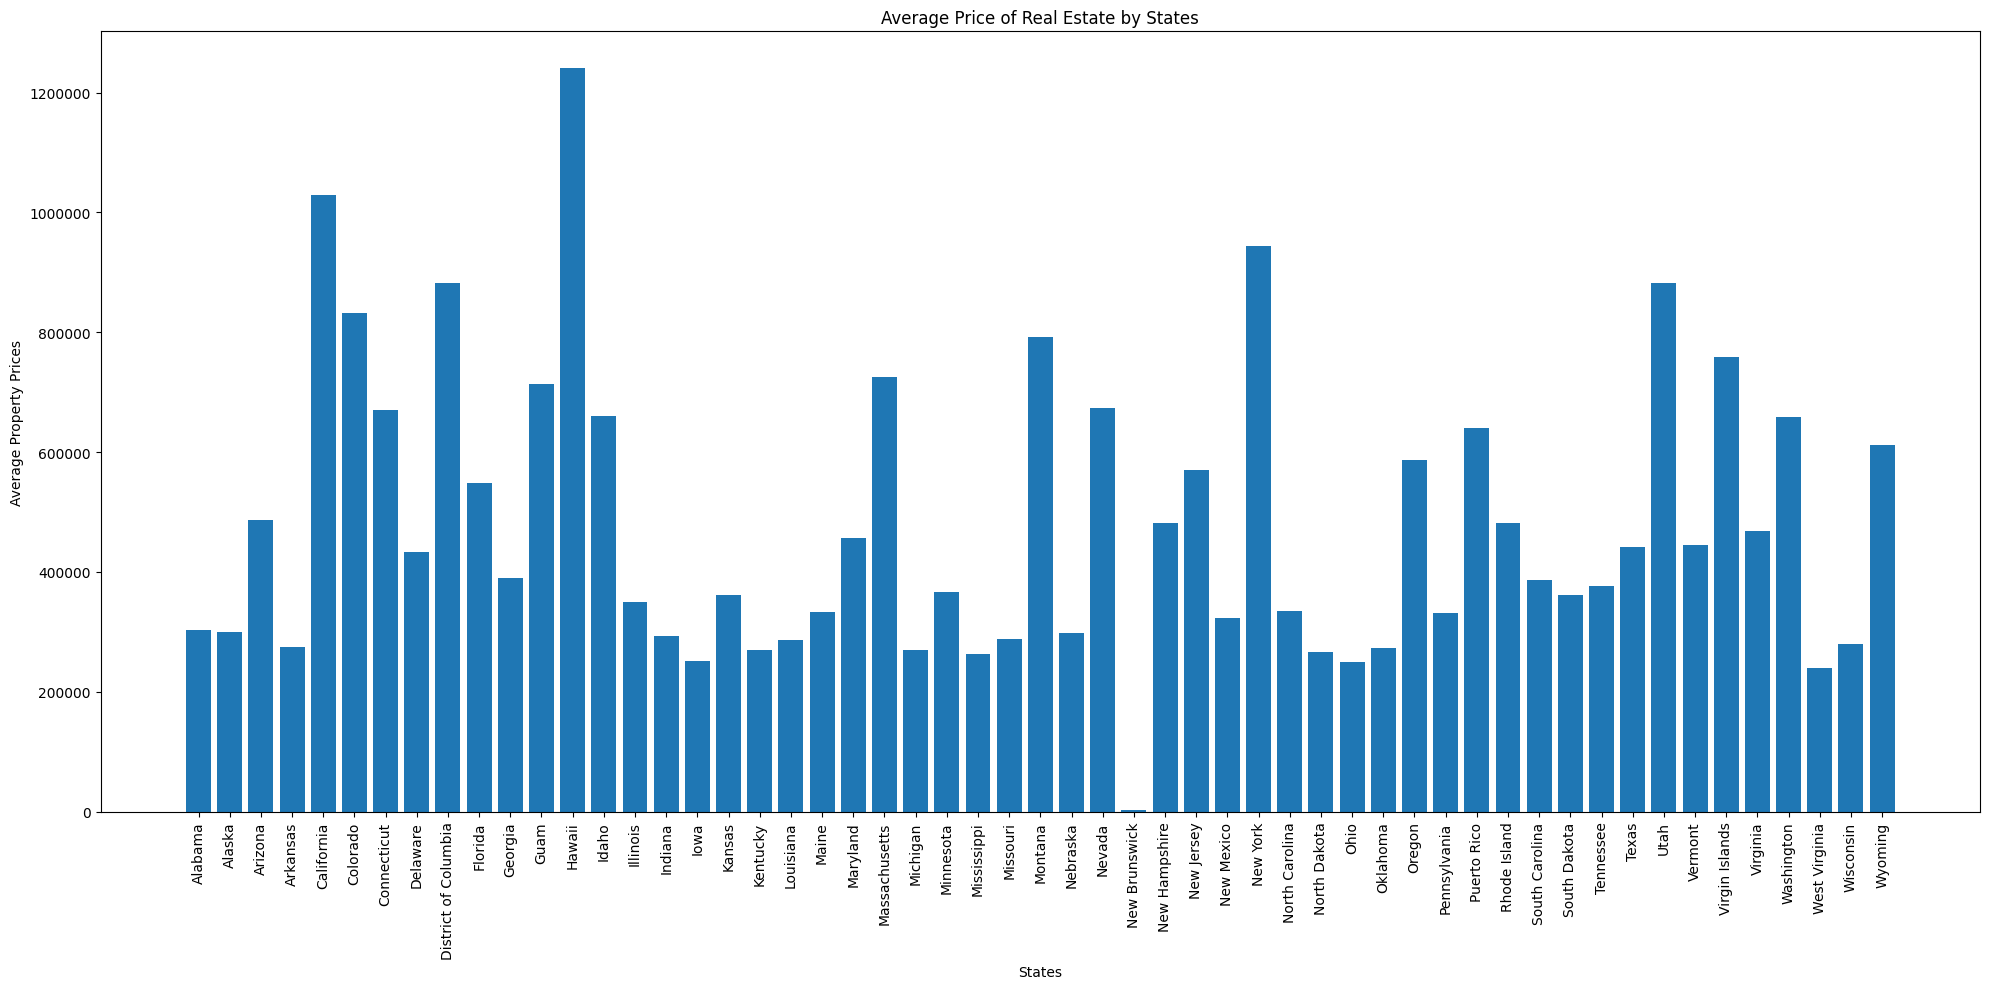

In [15]:
import matplotlib.pyplot as plt

avg_prices = df_visuals.groupby('state')['price'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.bar(avg_prices['state'], avg_prices['price'])
plt.xlabel("States")
plt.ylabel("Average Property Prices")
plt.title("Average Price of Real Estate by States")
plt.xticks(rotation=90)

plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()


In [12]:
df_visuals['state'].value_counts(ascending=True).head(10)
# Since we do not have enough data to find average price in some states, the graph shows unfairly low and unfairly high for some states
# So we remove states with a count less than 3,000 later in the preprocessing stage

state
New Brunswick        1
Guam               489
Virgin Islands     895
Alaska            2581
Vermont           2600
Puerto Rico       3126
New Hampshire     3642
Wyoming           4039
North Dakota      4268
South Dakota      4690
Name: count, dtype: int64

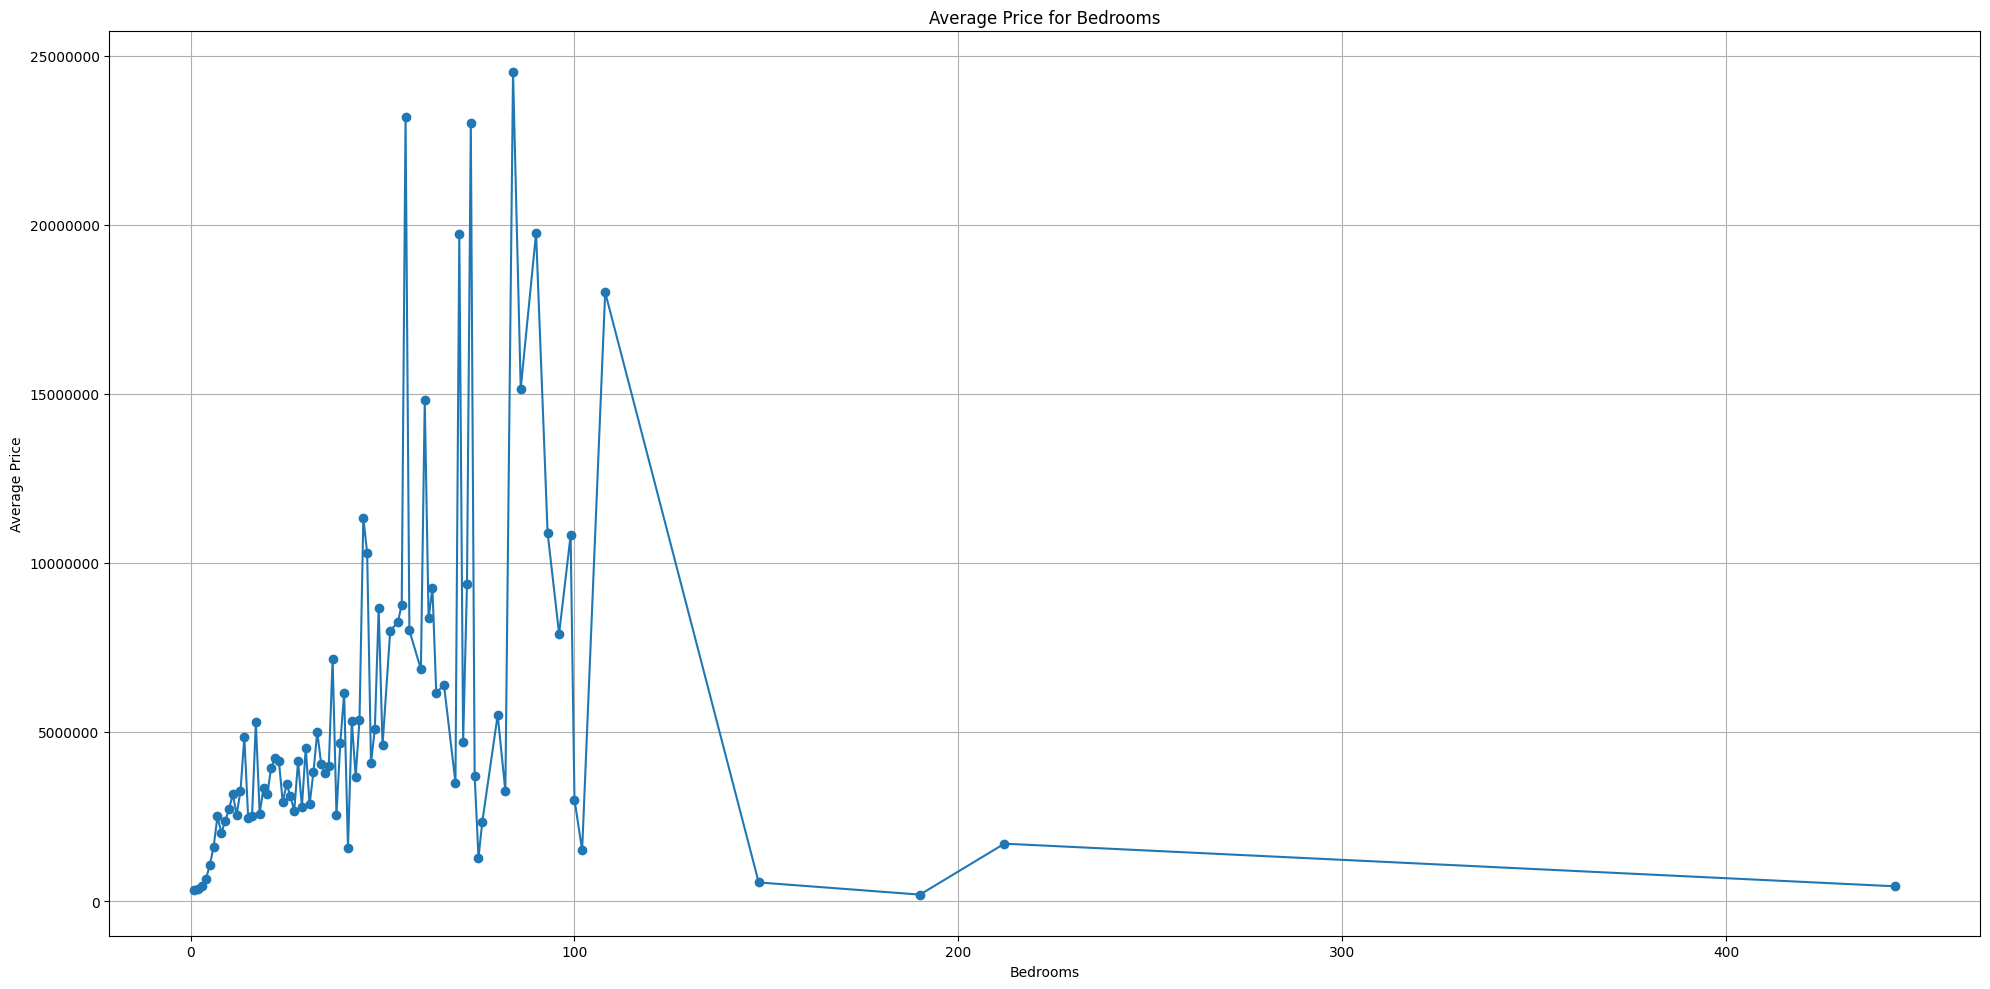

In [14]:
avg_prices_beds = df.groupby('bed')['price'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(avg_prices_beds['bed'], avg_prices_beds['price'], marker='o')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price for Bedrooms')
plt.grid(True)

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

There is a huge number of outliers for bedrooms, let us zoom in to see where the outliers begin

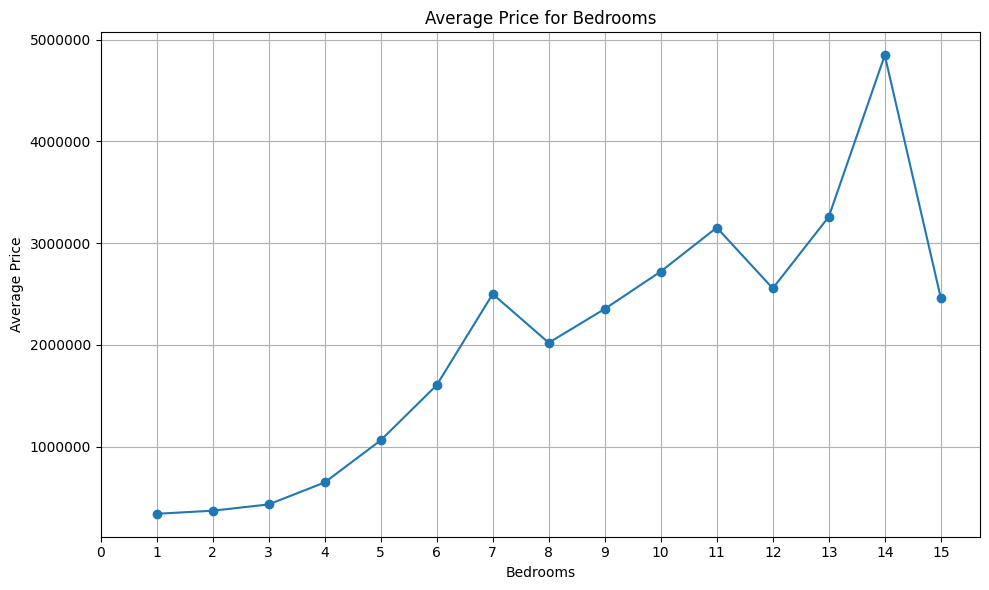

In [16]:
filtered_data = df[(df['bed'] <= 15)]

avg_prices_beds_filtered = filtered_data.groupby('bed')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(avg_prices_beds_filtered['bed'], avg_prices_beds_filtered['price'], marker='o')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price for Bedrooms')
plt.grid(True)

plt.xticks(range(16))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [17]:
# After 7 bedrooms, everything is below 6,000 rows meaning they are noisy data. We remove them in the pre-processing stage
df[(df['bed'] == 7)].shape


(6278, 7)

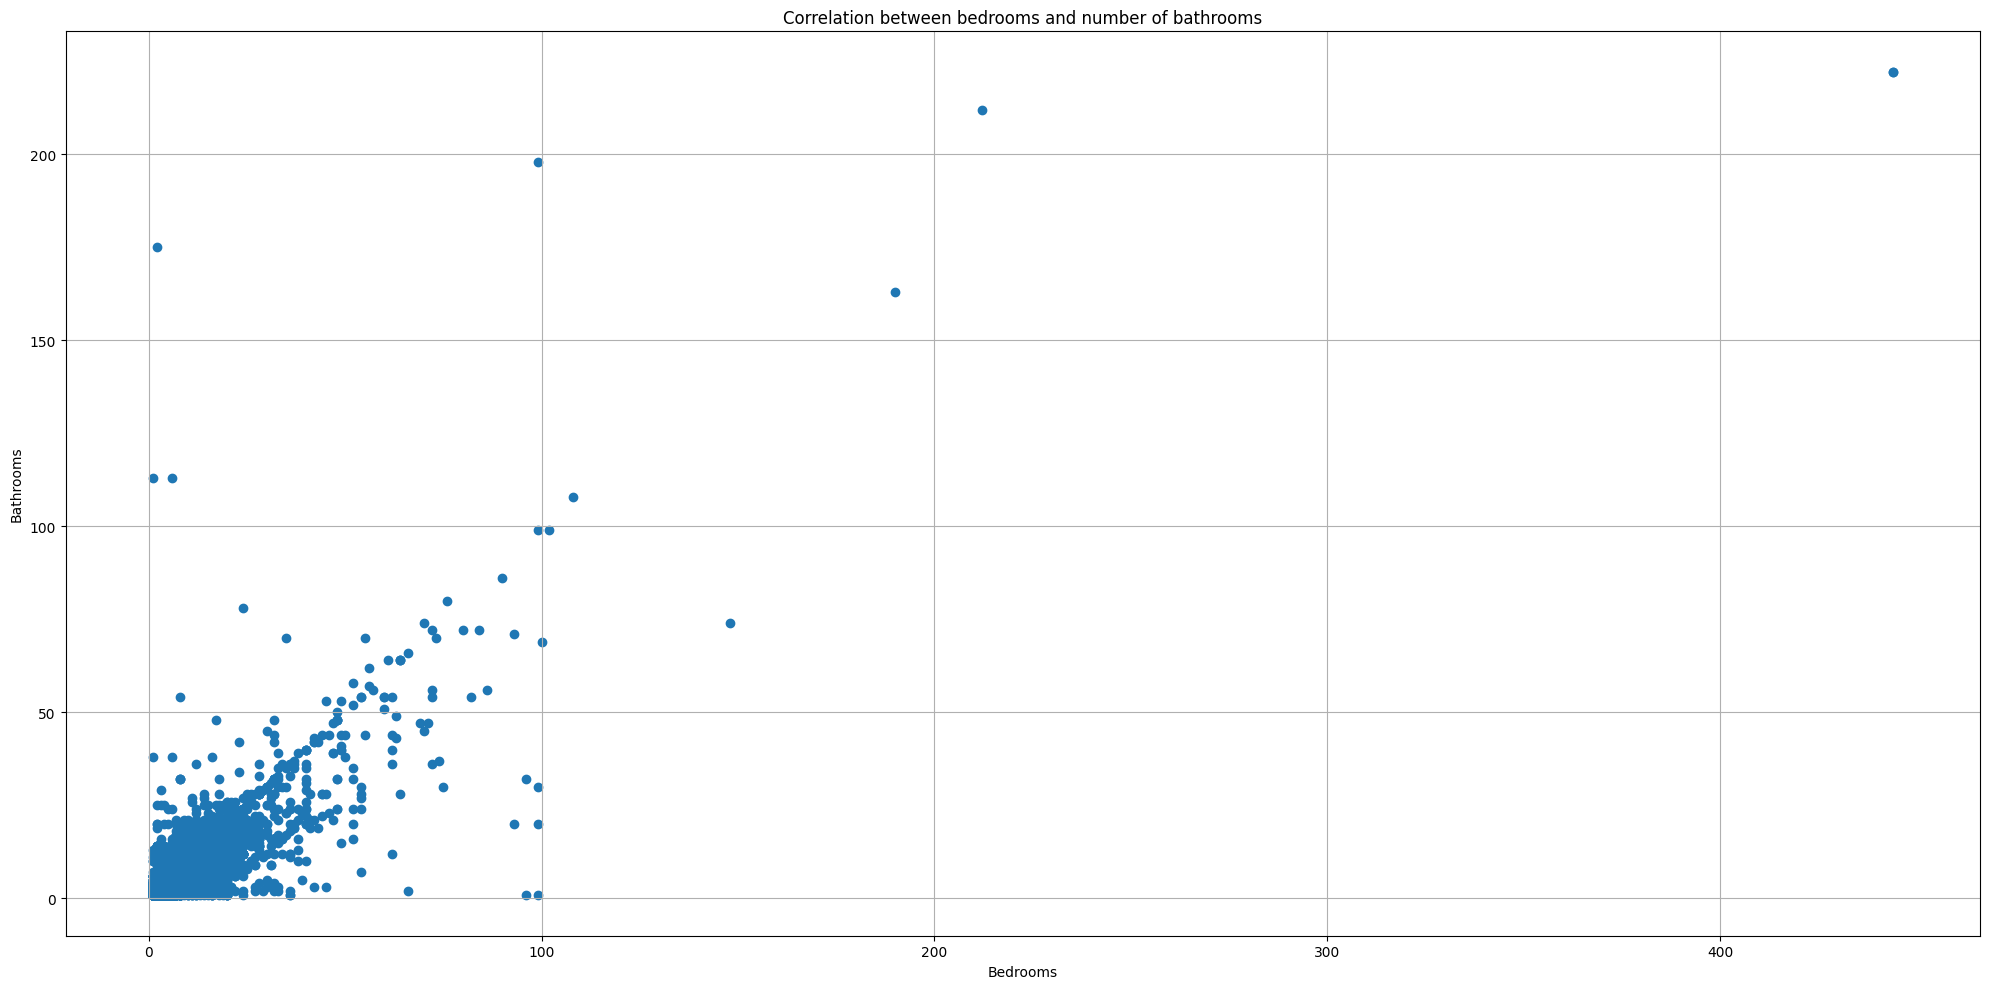

In [18]:
# Now we check bedrooms with bathrooms
plt.figure(figsize=(20,10))
plt.scatter(df['bed'], df['bath'])
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.title('Correlation between bedrooms and number of bathrooms')

plt.grid(True)

plt.tight_layout()
plt.show()

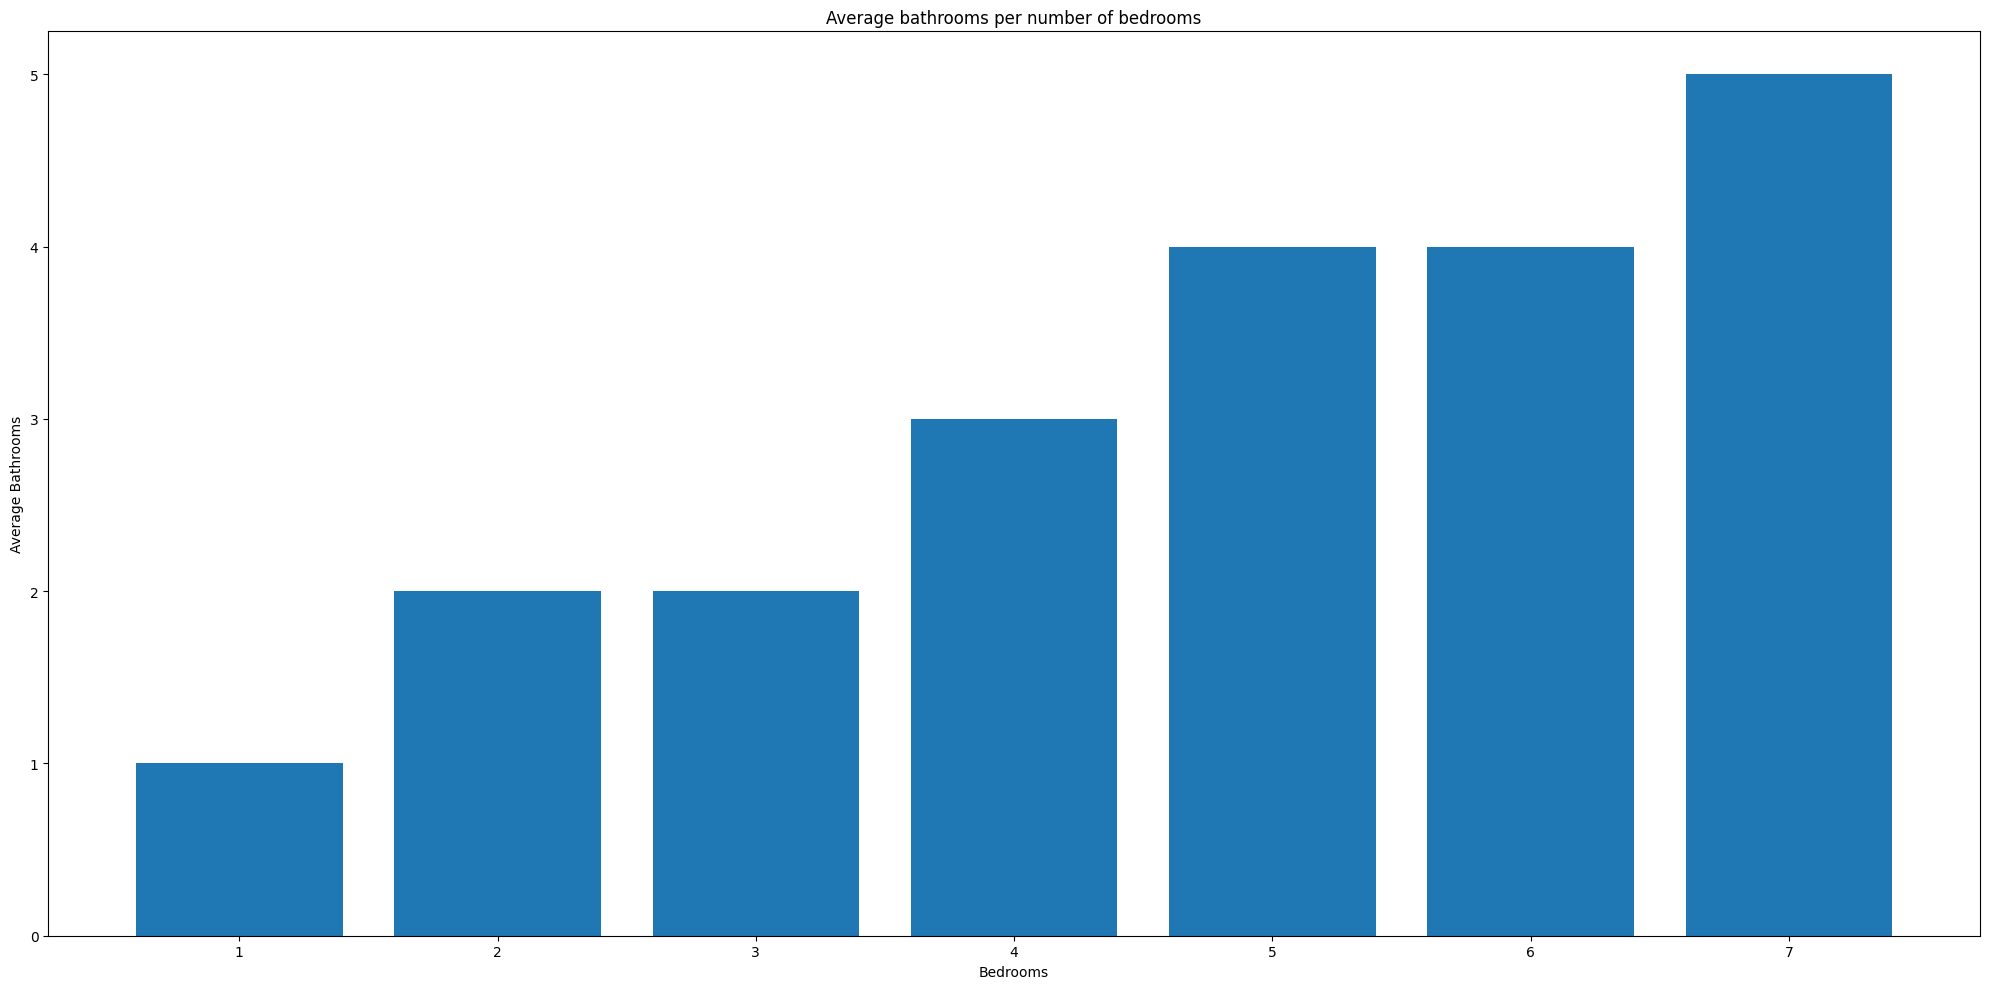

In [19]:
filtered_data = df[(df['bed'] <= 7)]
avg_bathrooms = filtered_data.groupby('bed')['bath'].mean().round().reset_index()

plt.figure(figsize=(20,10))
plt.bar(avg_bathrooms['bed'], avg_bathrooms['bath'])
plt.xlabel("Bedrooms")
plt.ylabel("Average Bathrooms")
plt.title("Average bathrooms per number of bedrooms")

plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()


We found the average maximum to be 5 bathroom that means we remove all data after 5 bathrooms

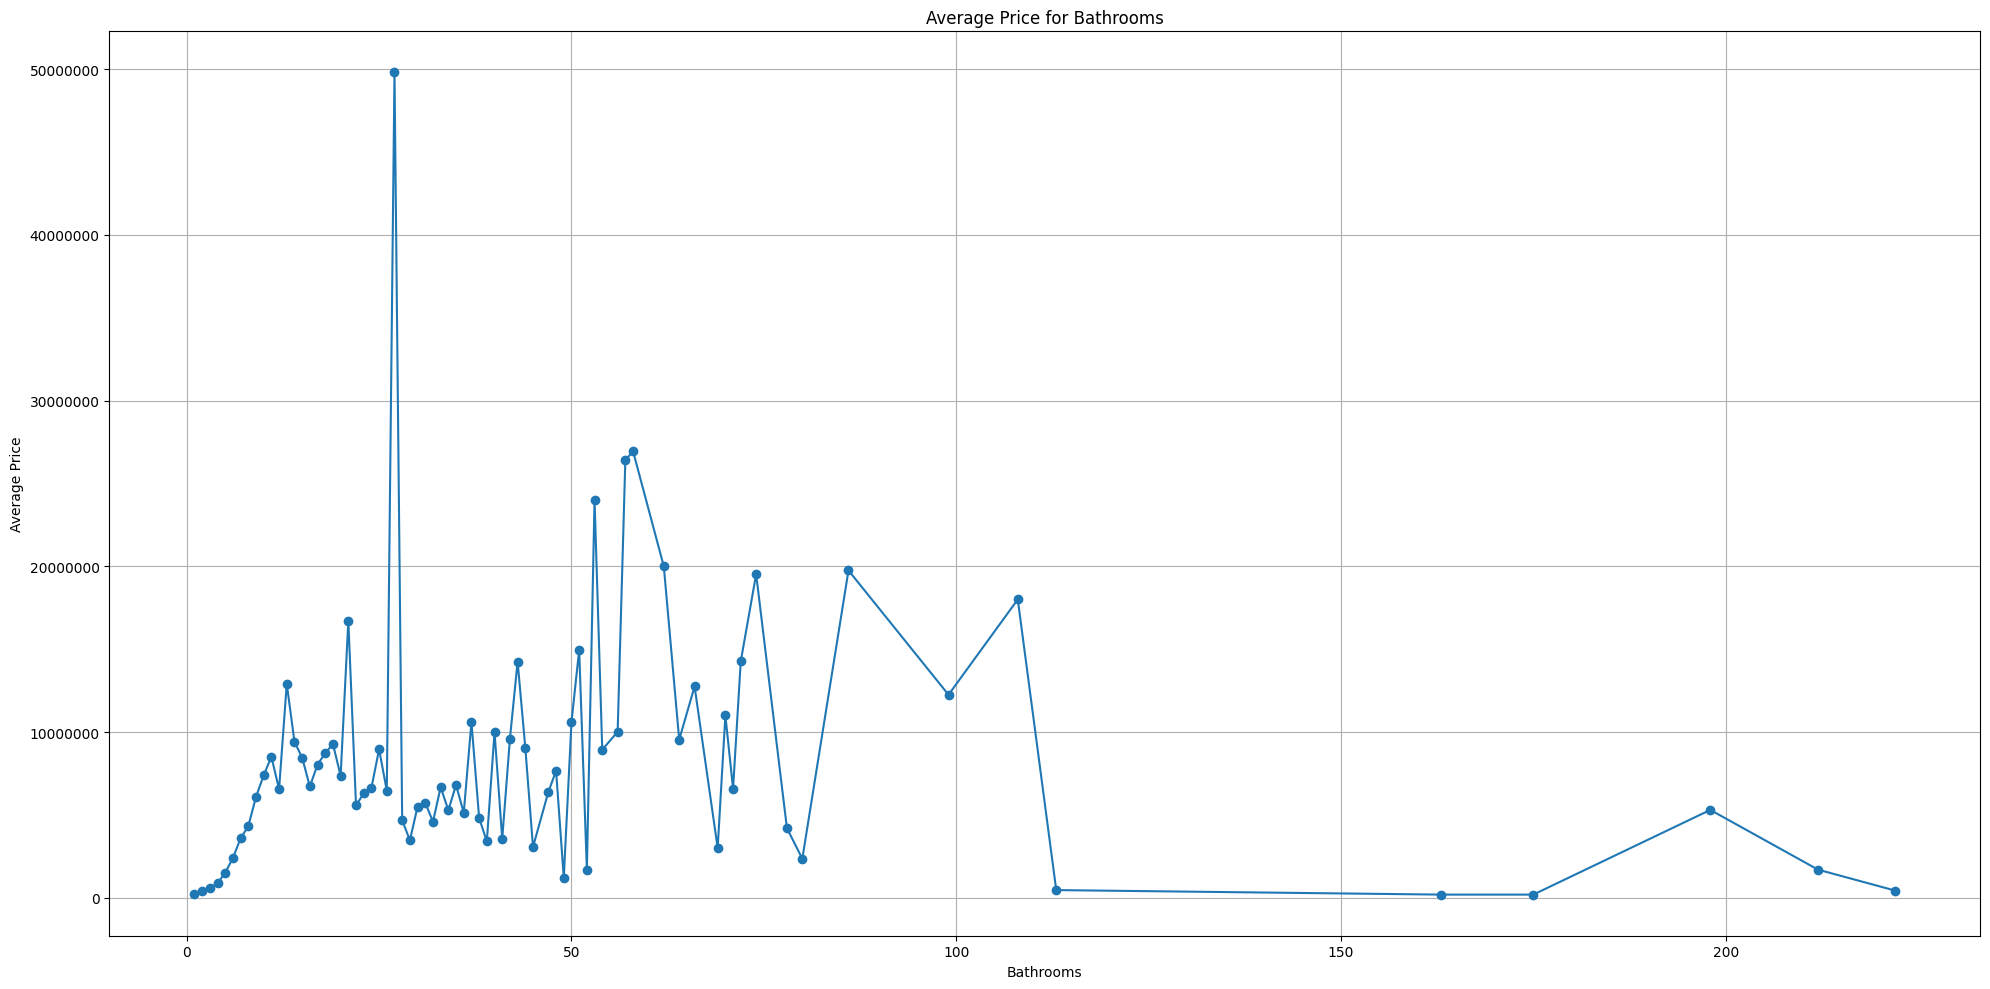

In [20]:
avg_prices_bath = df.groupby('bath')['price'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(avg_prices_bath['bath'], avg_prices_bath['price'], marker='o')
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price for Bathrooms')
plt.grid(True)

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

We can see the correlation between bathrooms and average price after zooming in further

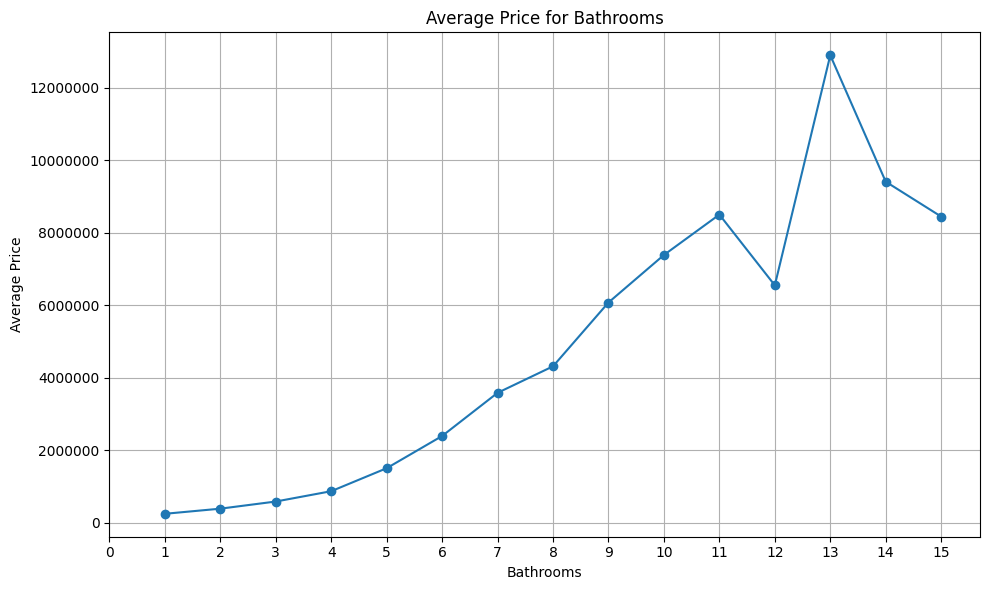

In [21]:
filtered_data = df[(df['bath'] <= 15)]

avg_prices_bath_filtered = filtered_data.groupby('bath')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(avg_prices_bath_filtered['bath'], avg_prices_bath_filtered['price'], marker='o')
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price for Bathrooms')
plt.grid(True)

plt.xticks(range(16))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Although maximum average was 5 bathrooms, we notice here that the line grows normally until 11. After that is unusual movement, hence we remove all data after 11 bathrooms.

In [22]:
# After 7 bedrooms, everything is below 420 rows meaning they are noisy data. We remove them in the pre-processing stage

df['bath'].value_counts().head(20)

bath
2.0     590988
3.0     386042
1.0     184794
4.0     131452
5.0      38837
6.0      14600
7.0       6169
8.0       3460
9.0       1629
10.0       879
11.0       428
12.0       412
13.0       173
14.0       152
16.0       123
15.0       103
18.0        63
20.0        46
17.0        39
24.0        32
Name: count, dtype: int64

## Pre-processing data

In [22]:
df2 = df.copy()
df2.head()

,price,bed,bath,acre_lot,house_size,city_encoded,state_encoded
0,105000.0,3.0,2.0,0.12,920.0,92,41
1,80000.0,4.0,2.0,0.08,1527.0,92,41
2,67000.0,2.0,1.0,0.15,748.0,8788,41
3,145000.0,4.0,2.0,0.10,1800.0,14314,41
5,179000.0,4.0,3.0,0.46,2520.0,15871,41


In [27]:
# Here we check the outliers in our dataset for which there isn't enough data to be able to predict on it
bed_outlier_df = df2[df2.groupby('bed')['bed'].transform('size')<=6000]
bed_outlier_df

,price,bed,bath,acre_lot,house_size,city_encoded,state_encoded
39,650000.0,9.0,7.0,0.46,3709.0,10936,41
115,649900.0,8.0,3.0,0.19,3700.0,116,41
133,125000.0,8.0,5.0,0.09,2000.0,8172,41
146,750000.0,12.0,6.0,0.52,4800.0,2422,41
148,950000.0,9.0,8.0,0.17,3852.0,15142,41
...,...,...,...,...,...,...,...
2224959,674900.0,9.0,6.0,0.21,4281.0,14631,51
2225427,780000.0,8.0,4.0,0.52,3200.0,18846,51
2226056,650000.0,12.0,6.0,0.27,4480.0,8981,51
2226137,625000.0,8.0,6.0,0.25,3698.0,8981,51


In [28]:
bed_outlier_df['bed'].value_counts()

bed
8.0     4389
9.0     1789
10.0     997
12.0     742
11.0     445
        ... 
76.0       1
57.0       1
74.0       1
75.0       1
80.0       1
Name: count, Length: 77, dtype: int64

In [29]:
df2.shape

(1360716, 7)

In [30]:
df2 = df2.drop(bed_outlier_df.index)
df2.shape

(1350928, 7)

After we cut down some data, there will be a new count for all the other features. So we check the new counts for bathrooms and remove everything after 11 bathrooms.

In [35]:
df2['bath'].value_counts().head(15)         # new count for 11 bathrooms is 171

bath
2.0     590724
3.0     384789
1.0     184733
4.0     129361
5.0      37850
6.0      13477
7.0       5586
8.0       2499
9.0       1125
10.0       445
11.0       171
12.0        73
13.0        38
14.0        24
15.0         6
Name: count, dtype: int64

In [36]:
bath_outlier_df = df2[df2.groupby('bath')['bath'].transform('size')<=150]
bath_outlier_df['bath'].value_counts()

bath
12.0     73
13.0     38
14.0     24
15.0      6
20.0      6
16.0      4
17.0      3
25.0      3
24.0      2
38.0      2
113.0     2
18.0      1
19.0      1
29.0      1
21.0      1
175.0     1
Name: count, dtype: int64

In [37]:
df2 = df2.drop(bath_outlier_df.index)
df2.shape

(1350760, 7)

Counts have been changed for States too, Vermont started at around 3,000 now its count is at 1,200

In [39]:
df2['state_encoded'].value_counts(ascending=True)

state_encoded
11       111
49       117
1        761
48      1217
31      1696
41      1745
54      1750
44      2028
20      2191
36      2371
8       2675
12      3988
28      4269
27      5067
7       6083
42      6252
52      6967
25      7329
6       9195
47      9552
29     10049
17     11199
3      11347
15     11515
13     11660
33     11766
19     14383
0      14659
18     15686
16     16475
43     17115
45     18249
53     18358
32     19284
5      19445
39     21709
23     21938
38     26905
22     27004
26     30069
24     32614
21     32869
35     37206
37     40912
50     44125
51     46190
14     46692
10     49110
34     49765
40     51612
2      54394
9     127029
46    145108
4     168955
Name: count, dtype: int64

In [40]:
state_outlier_df = df2[df2.groupby('state_encoded')['state_encoded'].transform('size')<=1220]
state_outlier_df

,price,bed,bath,acre_lot,house_size,city_encoded,state_encoded
2260,175000.0,5.0,2.0,0.21,1140.0,15758,49
2262,1599000.0,4.0,6.0,1.04,6760.0,15758,49
2264,925000.0,3.0,5.0,0.81,4500.0,15758,49
2270,950000.0,5.0,4.0,0.99,5000.0,15758,49
2272,875000.0,5.0,4.0,1.80,3300.0,15758,49
...,...,...,...,...,...,...,...
1414808,799000.0,5.0,4.0,0.65,3833.0,3243,49
1414821,650000.0,2.0,1.0,0.32,1543.0,3243,49
1418293,279918.0,2.0,1.0,1.00,1276.0,17064,48
1418295,449900.0,4.0,2.0,3.79,2160.0,17064,48


In [41]:
df2 = df2.drop(state_outlier_df.index)
df2.shape

(1348554, 7)

In [62]:
# They give same result, which means we keep the minimum for city_encoded as 180
df[df.groupby('city_encoded')['city_encoded'].transform('size') <= 180]['city_encoded'].value_counts()
df2[df2.groupby('city_encoded')['city_encoded'].transform('size') <= 180]['city_encoded'].value_counts()

city_encoded
13344    180
9137     180
11179    180
13144    180
5514     179
        ... 
15840      1
233        1
64         1
14870      1
8341       1
Name: count, Length: 15431, dtype: int64

In [63]:
city_outlier_df = df2[df2.groupby('city_encoded')['city_encoded'].transform('size')<=180]
city_outlier_df

,price,bed,bath,acre_lot,house_size,city_encoded,state_encoded
0,105000.0,3.0,2.0,0.12,920.0,92,41
1,80000.0,4.0,2.0,0.08,1527.0,92,41
2,67000.0,2.0,1.0,0.15,748.0,8788,41
3,145000.0,4.0,2.0,0.10,1800.0,14314,41
5,179000.0,4.0,3.0,0.46,2520.0,15871,41
...,...,...,...,...,...,...,...
2226348,249000.0,5.0,4.0,0.25,3040.0,3588,51
2226351,578500.0,3.0,3.0,5.00,1967.0,7801,39
2226353,280000.0,3.0,2.0,0.34,1274.0,11466,39
2226354,215000.0,2.0,2.0,0.12,1524.0,11466,39


In [64]:
df2 = df2.drop(city_outlier_df.index)
df2.shape

(958698, 7)

In [65]:
df2.duplicated().sum()

76679

In [66]:
df2 = df2.drop_duplicates()
df2.shape

(882019, 7)

In [67]:
# Shuffling dataset
df2 = df2.sample(frac=1)

## Classification after pre-processing

In [68]:
new_df = df2.copy()
new_df.shape

(882019, 7)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [70]:
df2['bed'].value_counts()

bed
3.0    402743
4.0    250263
2.0    124130
5.0     69034
6.0     17086
1.0     14920
7.0      3843
Name: count, dtype: int64

In [71]:
df2['bath'].value_counts()

bath
2.0     384080
3.0     258484
1.0     112319
4.0      87326
5.0      24892
6.0       8718
7.0       3544
8.0       1589
9.0        703
10.0       262
11.0       102
Name: count, dtype: int64

# Models training & prediction

How many bedrooms can you get based on the other features (1-7)

In [72]:
target_y3 = new_df['bed']
feature_X3 = new_df.drop(['bed'], axis=1)

train_X3, val_X3, train_y3, val_y3 = train_test_split(feature_X3, target_y3, test_size=0.2, random_state=42)

# Random Forest Classifier

In [73]:
rfr_model3 = RandomForestClassifier()
rfr_model3.fit(train_X3, train_y3)

RandomForestClassifier()

In [74]:
new_preds = rfr_model3.predict(val_X3)

In [75]:
accuracy_score(new_preds, val_y3)

0.6426554953402417

## Naive Bayes - Gaussian

In [76]:
Gaussnb_model = GaussianNB()
Gaussnb_model.fit(train_X3, train_y3)

GaussianNB()

In [77]:
gauss_preds = Gaussnb_model.predict(val_X3)

In [78]:
accuracy_score(val_y3, gauss_preds)

0.47875331625133216

# Decision Tree

In [79]:
dtr_model = DecisionTreeClassifier()
dtr_model.fit(train_X3, train_y3)

DecisionTreeClassifier()

In [80]:
dtr_preds = dtr_model.predict(val_X3)

In [81]:
accuracy_score(val_y3, dtr_preds)

0.5359799097526133

--------------------------------------

After trying 3 different classification models, it is clear that the Random Forest Classifier is the most accurate out of all.

---------------